### En este notebook se va a analizar los datos del dataset distance_km

In [2]:
import networkx as nx
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [3]:
df_distance_km = pd.read_excel("../dataset/df_distance_km.xlsx")
df_distance_km.head(5)

,CLIENTES,Cliente_1,Cliente_2,Cliente_3,Cliente_4,Cliente_5,Cliente_6,Cliente_7,Cliente_8,Cliente_9,...,Cliente_12,Cliente_13,Cliente_14,Cliente_15,Cliente_16,Cliente_17,Cliente_18,Cliente_19,Cliente_20,Almacén
0,Cliente_1,0.0000,7.5625,15.5365,1.1998,4.7145,1.7407,7.9408,17.1947,4.2933,...,6.0225,5.4470,2.2133,11.1505,1.5775,10.8288,9.1456,20.4871,22.1445,3.6114
1,Cliente_2,7.5625,0.0000,3.3838,7.7433,14.5720,8.5237,0.4847,13.7974,10.1522,...,10.1049,2.6961,13.4907,18.0835,7.0275,19.8218,8.2737,9.6369,19.1038,10.7361
2,Cliente_3,15.5365,3.3838,0.0000,12.5438,0.0000,0.0000,0.0000,16.0355,13.9120,...,12.3430,5.0114,15.7289,17.9217,9.6824,22.0599,10.5118,7.7574,16.5997,13.9021
3,Cliente_4,1.1998,7.7433,12.5438,0.0000,5.0721,0.9119,7.5798,17.4095,3.5781,...,6.2330,4.7117,2.8799,11.3610,1.3127,11.1926,9.3561,20.7019,21.1518,3.3673
4,Cliente_5,4.7145,14.5720,0.0000,5.0721,0.0000,4.8187,0.0000,0.0000,0.0000,...,6.8738,9.1064,3.6476,12.0019,5.4347,5.2872,9.9969,21.3384,25.5947,4.5417


In [4]:
df_distance_km.isna().sum()

CLIENTES      0
Cliente_1     0
Cliente_2     0
Cliente_3     0
Cliente_4     0
Cliente_5     0
Cliente_6     0
Cliente_7     0
Cliente_8     0
Cliente_9     0
Cliente_10    0
Cliente_11    0
Cliente_12    0
Cliente_13    0
Cliente_14    0
Cliente_15    0
Cliente_16    0
Cliente_17    0
Cliente_18    0
Cliente_19    0
Cliente_20    0
Almacén       0
dtype: int64

In [5]:
df_distance_km.dtypes

CLIENTES       object
Cliente_1     float64
Cliente_2     float64
Cliente_3     float64
Cliente_4     float64
Cliente_5     float64
Cliente_6     float64
Cliente_7     float64
Cliente_8     float64
Cliente_9     float64
Cliente_10    float64
Cliente_11    float64
Cliente_12    float64
Cliente_13    float64
Cliente_14    float64
Cliente_15    float64
Cliente_16    float64
Cliente_17    float64
Cliente_18    float64
Cliente_19    float64
Cliente_20    float64
Almacén       float64
dtype: object

In [6]:
df_distance_km.describe().T

,count,mean,std,min,25%,50%,75%,max
Cliente_1,21.0,7.536357,6.507082,0.0,2.2133,5.4470,10.8288,22.1445
Cliente_2,21.0,9.864667,5.641242,0.0,7.1521,9.6369,13.7974,19.8218
Cliente_3,21.0,10.621152,6.779304,0.0,5.0114,12.5438,15.7289,22.0599
Cliente_4,21.0,7.357362,6.330445,0.0,2.8799,5.0721,11.1926,21.1518
Cliente_5,21.0,6.802043,6.880651,0.0,2.6253,5.0721,9.1064,25.5947
Cliente_6,21.0,7.300319,6.645782,0.0,2.6952,4.8187,11.4008,20.4797
Cliente_7,21.0,7.347762,6.197532,0.0,0.0000,7.8866,10.2968,20.0138
Cliente_8,21.0,14.801343,7.426677,0.0,12.9161,14.8623,17.4095,34.1368
Cliente_9,21.0,9.005157,7.157035,0.0,3.5781,7.7229,13.2255,24.5670
Cliente_10,21.0,6.969476,5.559162,0.0,3.3451,5.9516,8.2196,21.1407


In [7]:
df_distance_km_clientes = df_distance_km['CLIENTES']
lista_clientes = df_distance_km_clientes.values.tolist()
df_distance_km = df_distance_km.drop('CLIENTES', axis=1)
matriz_distance_km = df_distance_km.to_numpy()
lista_clientes
#matriz_distance_km

['Cliente_1',
 'Cliente_2',
 'Cliente_3',
 'Cliente_4',
 'Cliente_5',
 'Cliente_6',
 'Cliente_7',
 'Cliente_8',
 'Cliente_9',
 'Cliente_10',
 'Cliente_11',
 'Cliente_12',
 'Cliente_13',
 'Cliente_14',
 'Cliente_15',
 'Cliente_16',
 'Cliente_17',
 'Cliente_18',
 'Cliente_19',
 'Cliente_20',
 'Almacén']

In [25]:
G = nx.Graph()

# Agregar nodos al grafo
G.add_nodes_from(df_distance_km)
print(f"NODOS: {G.nodes()}")

# Agregar aristas al grafo usando el DataFrame
for _, row in df_distance_km.iterrows():
    node1 = row.name  # Esto es el índice de la fila (por ejemplo, 'Cliente_1')
    for col, weight in row.items():
        if weight > 0:  # Si hay una relación (puedes usar > 0 si es una matriz binaria)
            G.add_edge(node1, col, weight=weight)

# Mostrar información del grafo
print("Nodos:", G.nodes())
print("Aristas:", G.edges())

NODOS: ['Cliente_1', 'Cliente_2', 'Cliente_3', 'Cliente_4', 'Cliente_5', 'Cliente_6', 'Cliente_7', 'Cliente_8', 'Cliente_9', 'Cliente_10', 'Cliente_11', 'Cliente_12', 'Cliente_13', 'Cliente_14', 'Cliente_15', 'Cliente_16', 'Cliente_17', 'Cliente_18', 'Cliente_19', 'Cliente_20', 'Almacén']
Nodos: ['Cliente_1', 'Cliente_2', 'Cliente_3', 'Cliente_4', 'Cliente_5', 'Cliente_6', 'Cliente_7', 'Cliente_8', 'Cliente_9', 'Cliente_10', 'Cliente_11', 'Cliente_12', 'Cliente_13', 'Cliente_14', 'Cliente_15', 'Cliente_16', 'Cliente_17', 'Cliente_18', 'Cliente_19', 'Cliente_20', 'Almacén', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Aristas: [('Cliente_1', 1), ('Cliente_1', 2), ('Cliente_1', 3), ('Cliente_1', 4), ('Cliente_1', 5), ('Cliente_1', 6), ('Cliente_1', 7), ('Cliente_1', 8), ('Cliente_1', 9), ('Cliente_1', 10), ('Cliente_1', 11), ('Cliente_1', 12), ('Cliente_1', 13), ('Cliente_1', 14), ('Cliente_1', 15), ('Cliente_1', 16), ('Cliente_1', 17), ('Cliente_1', 18), ('C

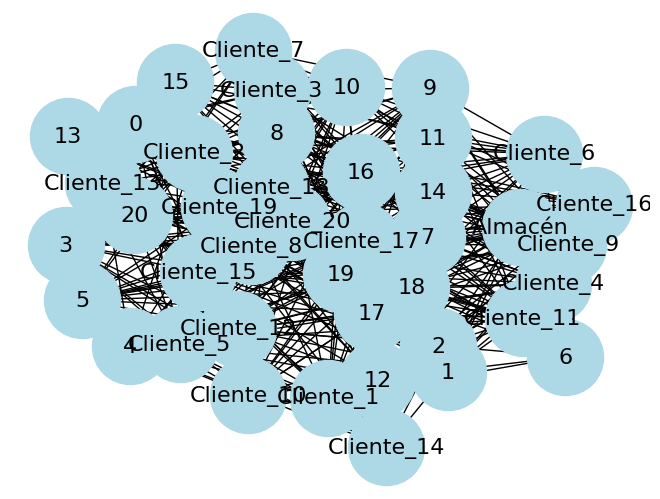

In [26]:
import matplotlib.pyplot as plt

# Dibujar el grafo
nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=16)
plt.show()